## 第103讲 LinearSVC or SVC of SVM

## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


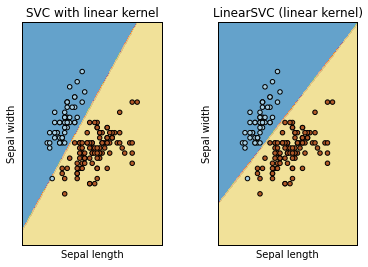

In [12]:
from IPython.display import Image
Image(filename='D:\python\Interview-Prepartion-Data-Science-master\Lesson103-1.png')

In [19]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC, SVC

In [20]:
X, y = load_iris(return_X_y=True)

In [21]:
clf_1 = LinearSVC().fit(X, y) 
clf_2 = SVC(kernel='linear').fit(X, y)

C:\Users\raymond\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
score_1 = clf_1.score(X, y)
score_2 = clf_2.score(X, y)

In [23]:
print('LinearSVC score %s' % score_1)
print('SVC score %s' % score_2)

LinearSVC score 0.9666666666666667
SVC score 0.9933333333333333


It mentions the difference between one-against-one and one-against-rest, and that the linear SVS is Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better (to large numbers of samples)

(1)LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction. It is also noted here. Also, for multi-class classification problem SVC fits N * (N - 1) / 2 models where N is the number of classes.

(2)LinearSVC, by contrast, simply fits N models. If the classification problem is binary, then just one model is slot in each situations. multi_class and decision_function_shape parameters have nothing in common. The second one is an aggregator that transforms the results of the decision function in a convenient shape of (n_features, n_samples). multi_class is an algorithmic approach to establish a solution.

(3)The underlying estimators for LinearSVC are liblinear, which does, in fact, penalize the intercept. SVC uses libsvm estimators that do not. liblinear estimators are optimized for a linear (special) case and so converge quicker on massive amounts of knowledge than libsvm. That is why LinearSVCtakes less time to resolve the problem.

(4)By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss. It is potential to manually outline a 'hinge' string for loss parameter in LinearSVC.

In machine learning, the hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

LinearSVC is actually minimizing squared hinge loss, instead of just hinge loss, furthermore, it penalizes size of the bias(intercept) (which is not SVM)

**It is not that scikit-learn developed a dedicated algorithm for linear SVM. Rather they implemented interfaces on top of two popular existing implementations. The underlying C implementation for LinearSVC is liblinear, and the solver for SVC is libsvm

In [ ]:
LinearSVC is not linear SVM, do not use it if do not have to

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
https://scikit-learn.org/stable/modules/svm.html